In [83]:
%matplotlib inline

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os
import jieba
import pprint

from os import path
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [85]:
stopwords_path = d + '/data/stopword.txt'

In [86]:
jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows

In [87]:
# if you want use wordCloud,you need it
# add userdict by add_word()
userdict_list = ['职业发展','吃','带','角色1','角色2','角色3','角色4','角色5','角色6','角色7','角色8','角色9','角色10','角色11','角色12','角色13','角色14']

In [88]:
# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


In [89]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [90]:
# Read the whole text.
text = open(path.join(d, 'data/访谈记录.txt')).read()
text[:110]

'\ufeff角色1：院里一直都非常重视大家职业发展，包括来我们医院之后的一个工作体验，大家来医院有一年了，医院也是希望大家有一个面对面的沟通交流，把大家心里这一年来的工作的感受，还有你们的疑惑，或者希望我们从医院层面能给大家包括人'

In [91]:
# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
zryhyy_coloring = np.array(Image.open(path.join(d, "data/zryhyy.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")


In [92]:
wc = WordCloud(background_color="white", max_words=2000, mask=zryhyy_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42
               ,font_path="data/simsun.ttf"
              )
# generate word cloud
text1 = jieba_processing_txt(text)
wc.generate(text1)

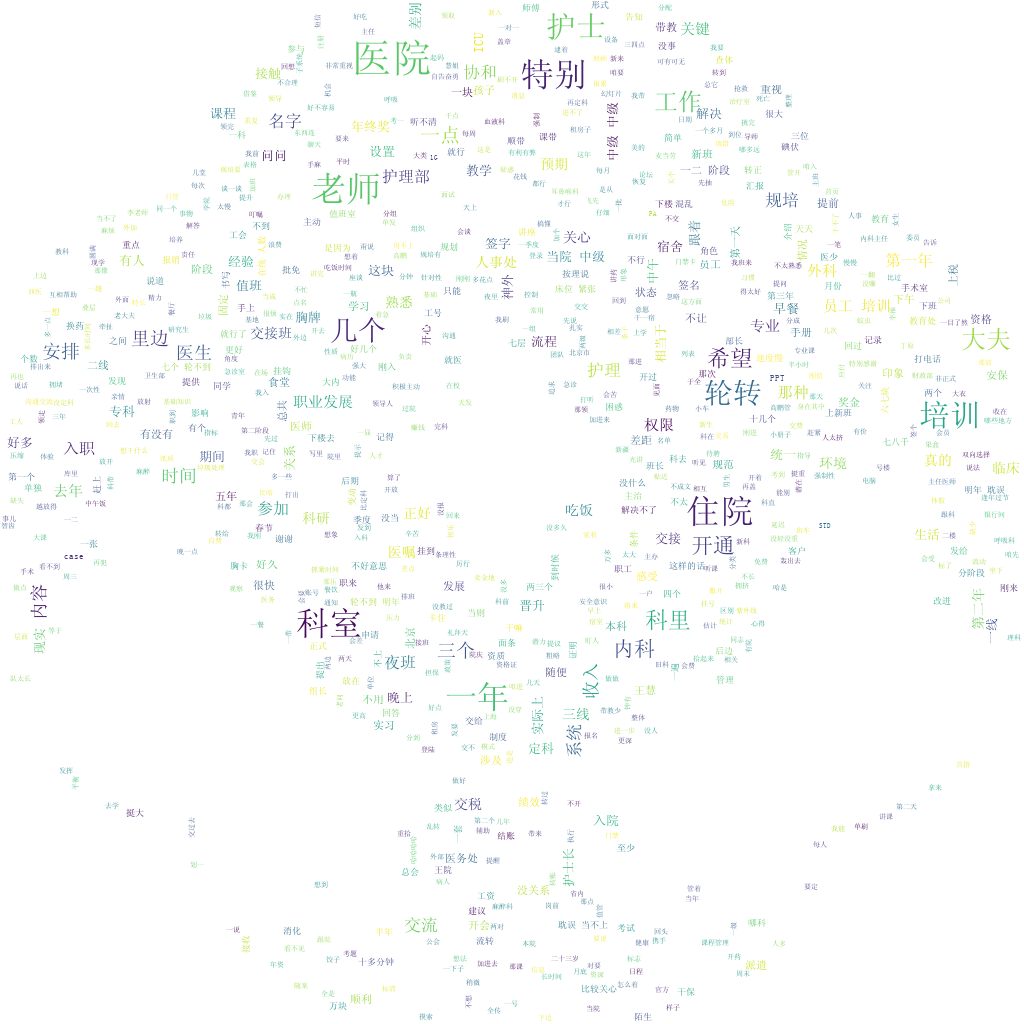

In [93]:
wc.to_image()

In [94]:
# create coloring from image
image_colors = ImageColorGenerator(zryhyy_coloring)


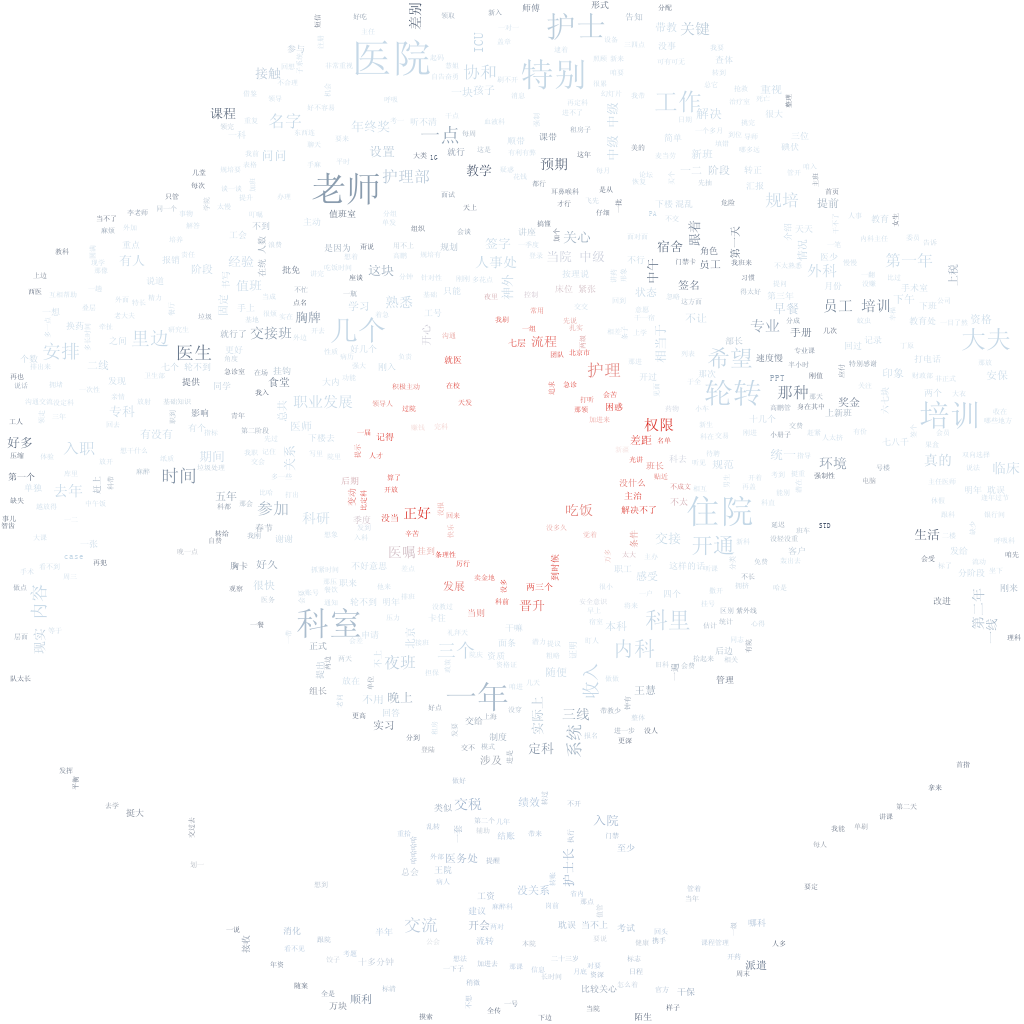

In [95]:
wc2 = wc.recolor(color_func=image_colors)
wc2.to_image()

In [96]:
text2 = jieba_processing_txt(text)

(-0.5, 799.5, 799.5, -0.5)

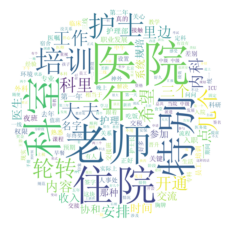

In [97]:
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)


wordcloud = WordCloud(font_path="data/simsun.ttf"
                      #,width=400
                      #,height=100
                      ,background_color="white"
                      #,repeat=True
                      ,mask=mask
                     ).generate(text2)
#%pylab inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

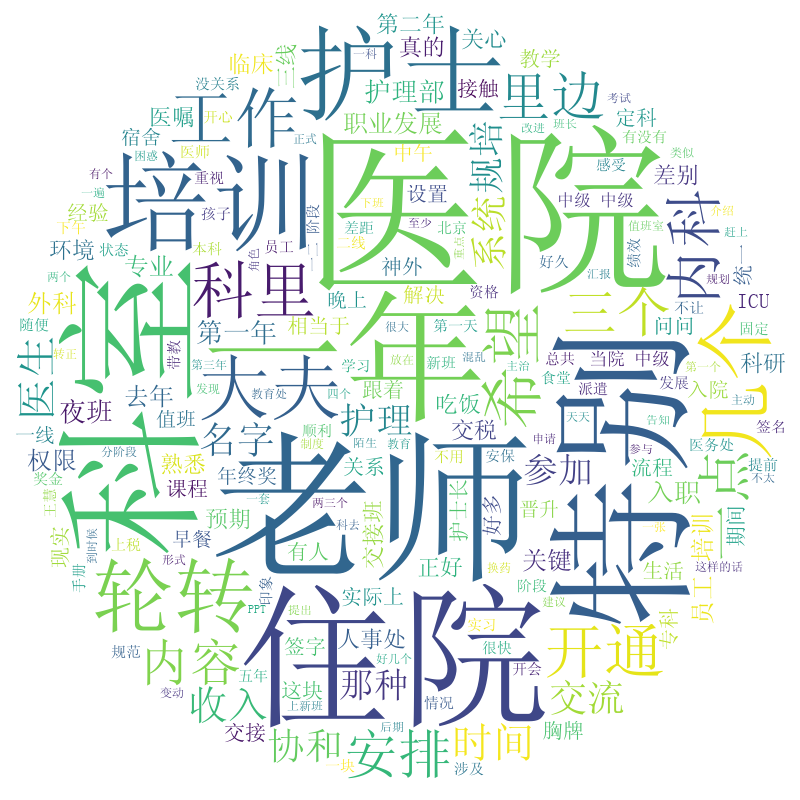

In [98]:
wordcloud.to_image()

In [99]:
sss = list(text1.split(' '))

stopwords = []

with open("data/stopword.txt", encoding="utf-8") as f:
    stopwords = f.read()

new_text = []

for w in sss:
    if w not in stopwords:
        new_text.append(w)

counter = Counter(new_text)
pprint.pprint(counter.most_common(50))

[('医院', 40),
 ('老师', 30),
 ('培训', 29),
 ('住院', 28),
 ('科室', 26),
 ('护士', 22),
 ('轮转', 21),
 ('几个', 20),
 ('大夫', 16),
 ('工作', 15),
 ('希望', 14),
 ('科里', 14),
 ('开通', 13),
 ('内科', 12),
 ('安排', 10),
 ('里边', 10),
 ('三个', 10),
 ('员工', 9),
 ('内容', 9),
 ('时间', 9),
 ('医生', 9),
 ('收入', 9),
 ('交流', 8),
 ('协和', 8),
 ('名字', 8),
 ('系统', 8),
 ('护理', 8),
 ('规培', 8),
 ('中级', 8),
 ('参加', 7),
 ('那种', 7),
 ('第一年', 7),
 ('入职', 7),
 ('护理部', 7),
 ('夜班', 7),
 ('职业发展', 6),
 ('外科', 6),
 ('关键', 6),
 ('阶段', 6),
 ('去年', 6),
 ('专业', 6),
 ('权限', 6),
 ('临床', 5),
 ('熟悉', 5),
 ('关心', 5),
 ('正好', 5),
 ('差别', 5),
 ('预期', 5),
 ('交接班', 5),
 ('医嘱', 5)]


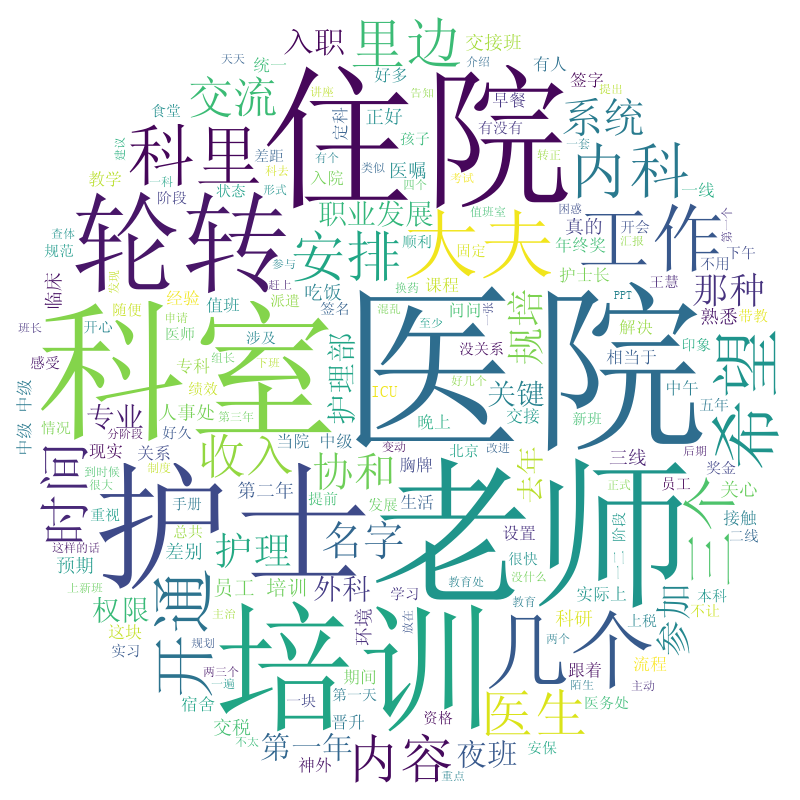

In [100]:
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)


wordcloud = WordCloud(font_path="data/simsun.ttf"
                      #,width=400
                      #,height=100
                      ,background_color="white"
                      #,repeat=True
                      ,mask=mask
                     ).generate(' '.join(new_text))


wordcloud.to_image()